Imports

In [94]:
import pandas as pd
from PIL import Image
import numpy
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import tree
from matplotlib import pyplot as plt

Training Split

In [95]:
trainDF = pd.read_excel('C:\\Users\\Sameed\\Desktop\\Machine-Learning-Ass-1\\Task1\\Train.xlsx')

imagePaths = trainDF['Path'].tolist()
imageLabels = trainDF['Identity'].tolist()

labels_to_id = {"Unknown":0,"Sameed":1}
id_to_label = {0:"Unknown",1:"Sameed "}


In [96]:

array_of_features = []
coloumn_heading = []
for i in range(0,12288):
    coloumn_heading.append("x"+str(i)+"_Train")


for images in imagePaths:
    img = Image.open(images)
    # imgGray = img.convert('L')

    array_img = numpy.array(img)
    array_img = array_img.flatten()

    array_of_features.append(array_img)

# trainFeatures_df = pd.DataFrame(array_of_features,columns=coloumn_heading)
# print(trainFeatures_df)

In [97]:
labels_ID = []

for labels in imageLabels:
    labels_ID.append(labels_to_id[labels])

# trainLabels_df = pd.DataFrame(labels_ID,columns=['Y_train'])
# print(trainLabels_df)


Testing Split

In [98]:
testDF = pd.read_excel('C:\\Users\\Sameed\\Desktop\\Machine-Learning-Ass-1\\Task1\\Test.xlsx')

imagePaths_test = testDF['Path'].tolist()
imageLabels_test = testDF['Identity'].tolist()


In [99]:

array_of_features_test = []
coloumn_heading_test = []

for i in range(0,12288):
    coloumn_heading_test.append("x"+str(i)+"_Test")


for images in imagePaths_test:
    img = Image.open(images)
    # imgGray = img.convert('L')

    array_img = numpy.array(img)
    array_img = array_img.flatten()

    array_of_features_test.append(array_img)

# testFeatures_df = pd.DataFrame(array_of_features_test,columns=coloumn_heading_test)
# print(testFeatures_df)

In [100]:
labels_ID_test = []

for labels in imageLabels_test:
    labels_ID_test.append(labels_to_id[labels])

# testLabels_df = pd.DataFrame(labels_ID_test,columns=['Y_test'])
# print(testLabels_df)


Decision Tree

Training

In [101]:

x_train = numpy.array(array_of_features)
y_train = numpy.array(labels_ID)

x_test = numpy.array(array_of_features_test)
y_test = numpy.array(labels_ID_test)


In [102]:
clf = DecisionTreeClassifier(criterion='entropy',random_state=16)
clf.fit(x_train, y_train)
# clf.get_params()


DecisionTreeClassifier(criterion='entropy', random_state=16)

Testing

In [103]:
prediction = clf.predict(x_test)

print(f"Labels      Predicted")
print(f"------      ---------")

for (labels_test,labels_predict) in zip(y_test,prediction):
    print(f"{id_to_label[labels_test]}      {id_to_label[labels_predict]}")
print()


accr = clf.score(x_test,y_test)
precision = precision_score(y_test, prediction, average=None)
recall =  recall_score(y_test, prediction, average=None)
f1 = f1_score(y_test, prediction, average=None)

print("Accuracy: ",accr)
print("Precision: ",precision)
print("Recall: ", recall)
print("F1: ", f1)

Labels      Predicted
------      ---------
Unknown      Unknown
Unknown      Unknown
Unknown      Unknown
Unknown      Unknown
Unknown      Sameed 
Unknown      Sameed 
Unknown      Unknown
Unknown      Unknown
Sameed       Sameed 
Sameed       Sameed 
Sameed       Sameed 
Sameed       Sameed 
Sameed       Sameed 
Sameed       Sameed 
Sameed       Sameed 
Sameed       Sameed 

Accuracy:  0.875
Precision:  [1.  0.8]
Recall:  [0.75 1.  ]
F1:  [0.85714286 0.88888889]


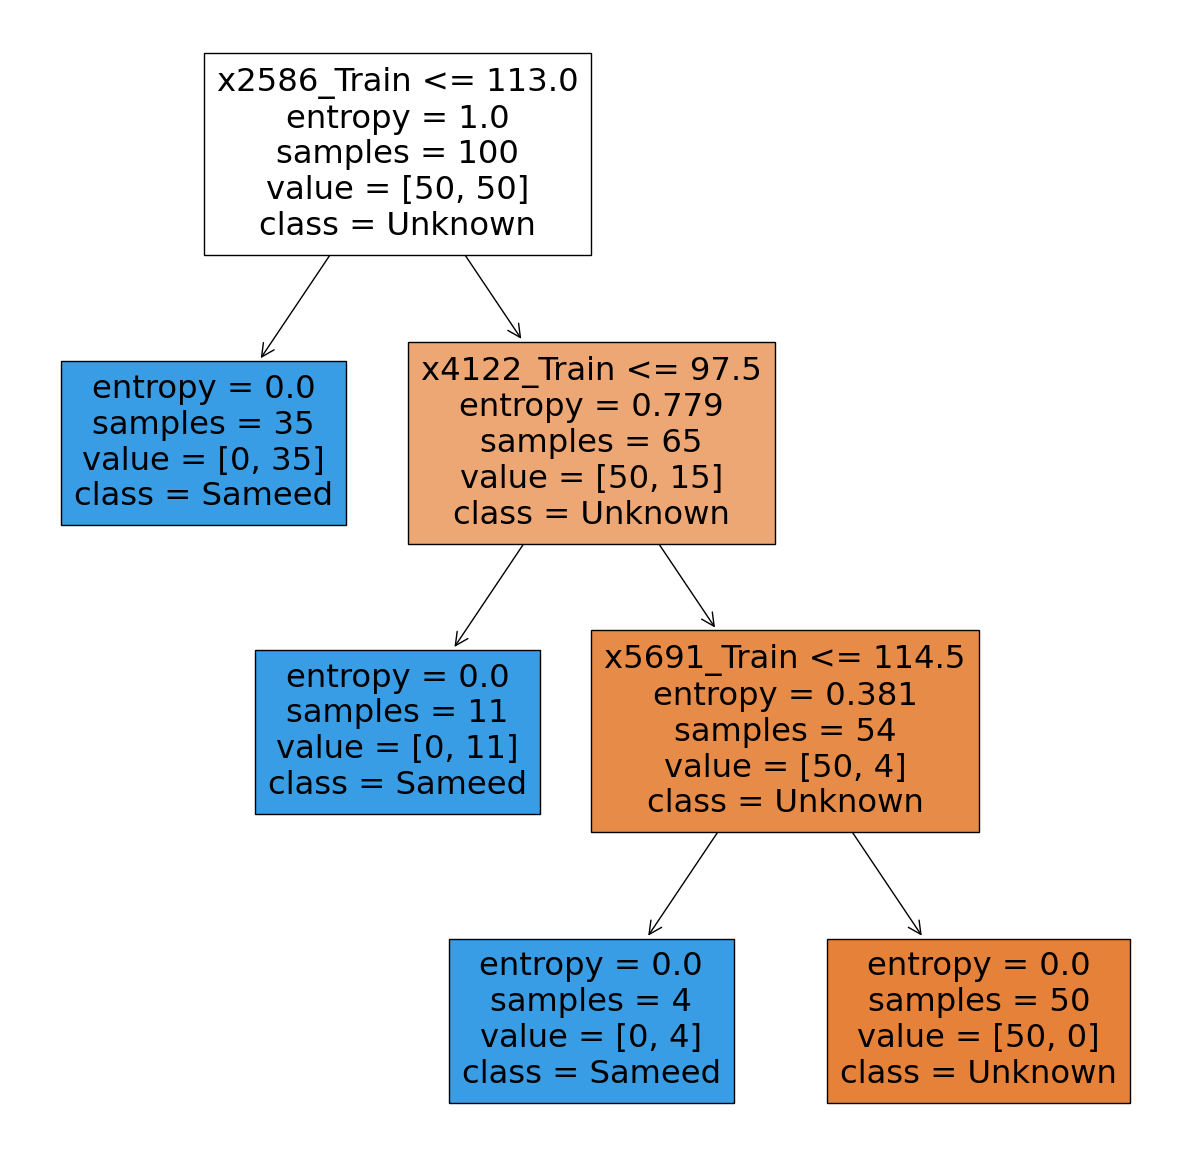

In [104]:
# text_representation = tree.export_text(clf)
# print(text_representation)

fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(clf, feature_names=coloumn_heading,  class_names=["Unknown","Sameed"],filled=True)